Import Data

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import math
import random
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('C:/Users/yolau/OneDrive/Documents/TA/Kodingan/BBCA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-18,4180.0,4220.0,4170.0,4220.0,3802.38208,76474000
1,2017-12-19,4190.0,4250.0,4190.0,4220.0,3802.38208,76553500
2,2017-12-20,4210.0,4210.0,4175.0,4185.0,3770.84668,102963500
3,2017-12-21,4190.0,4230.0,4190.0,4220.0,3802.38208,61100000
4,2017-12-22,4235.0,4335.0,4195.0,4300.0,3874.46582,94573000


In [3]:
specific_df = df[['Date', 'Close', 'Open', 'High', 'Low']]

In [4]:
specific_df

,Date,Close,Open,High,Low
0,2017-12-18,4220.0,4180.0,4220.0,4170.0
1,2017-12-19,4220.0,4190.0,4250.0,4190.0
2,2017-12-20,4185.0,4210.0,4210.0,4175.0
3,2017-12-21,4220.0,4190.0,4230.0,4190.0
4,2017-12-22,4300.0,4235.0,4335.0,4195.0
...,...,...,...,...,...
1489,2023-12-08,8750.0,8800.0,8850.0,8750.0
1490,2023-12-11,8750.0,8675.0,8775.0,8675.0
1491,2023-12-12,8700.0,8700.0,8750.0,8700.0
1492,2023-12-13,8675.0,8700.0,8750.0,8675.0


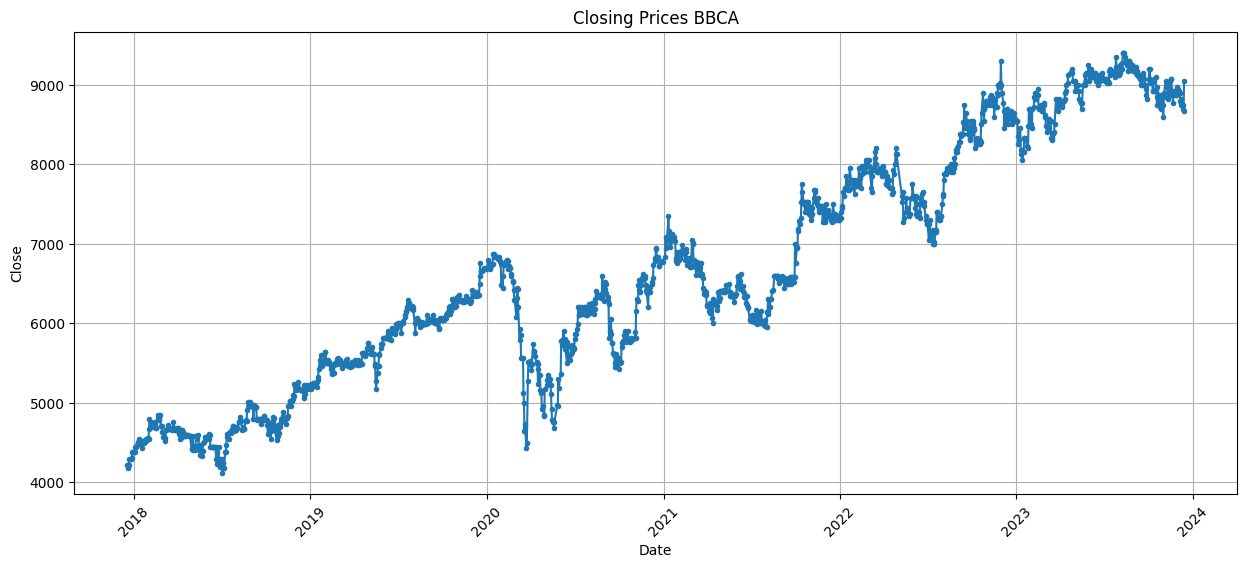

In [5]:
specific_df['Date'] = pd.to_datetime(specific_df['Date'])

plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], marker='.')
plt.title('Closing Prices BBCA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

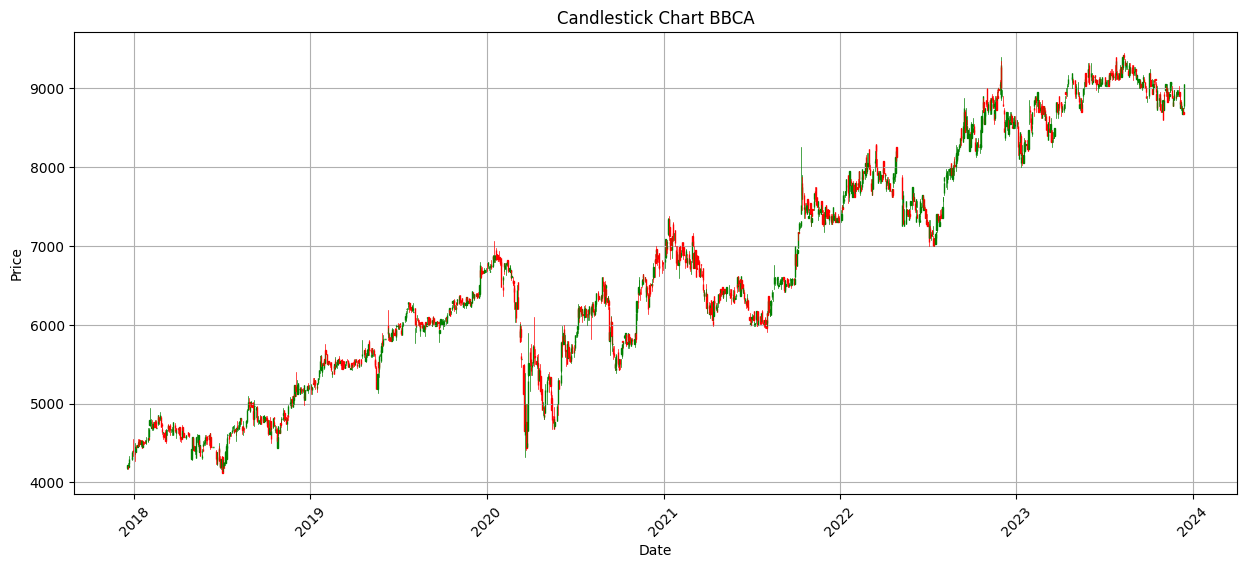

In [6]:
matplotlib_date = mdates.date2num(specific_df['Date'])

ohlc = np.vstack((matplotlib_date, specific_df['Open'], specific_df['High'], specific_df['Low'], specific_df['Close'])).T

plt.figure(figsize=(15,6))
ax = plt.subplot()
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
plt.title('Candlestick Chart BBCA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

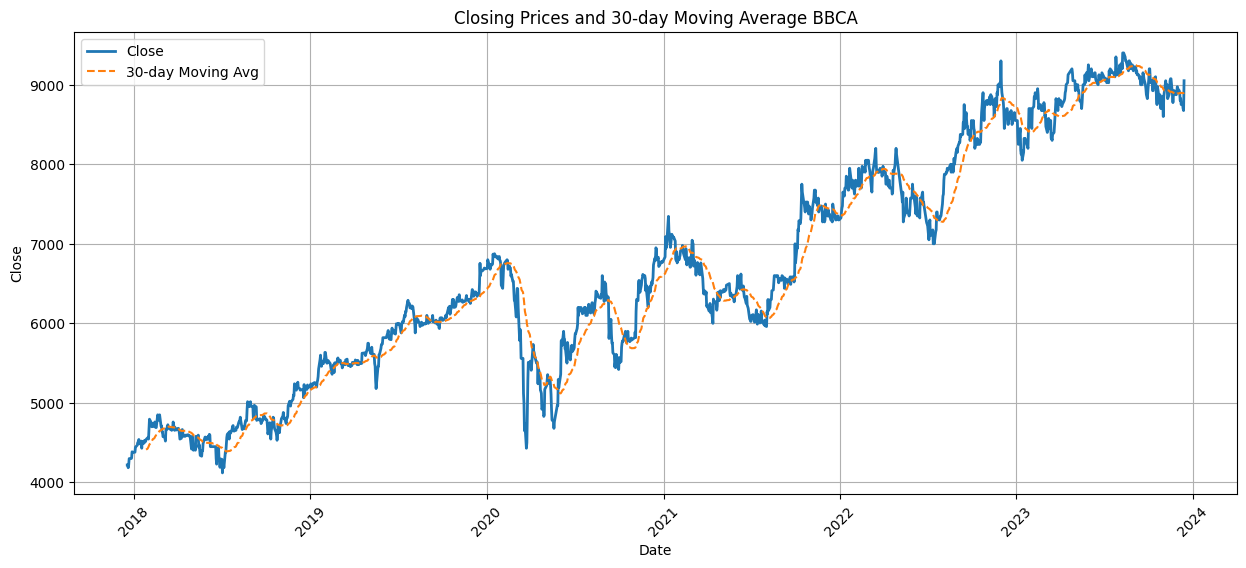

In [7]:
window = 30
plt.figure(figsize=(15,6))
plt.plot(specific_df['Date'], specific_df['Close'], label='Close', linewidth=2)
plt.plot(specific_df['Date'], specific_df['Close'].rolling(window=window).mean(),label=f'{window}-day Moving Avg', linestyle='--')
plt.title(f'Closing Prices and {window}-day Moving Average BBCA')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
specific_df.head()

,Date,Close,Open,High,Low
0,2017-12-18,4220.0,4180.0,4220.0,4170.0
1,2017-12-19,4220.0,4190.0,4250.0,4190.0
2,2017-12-20,4185.0,4210.0,4210.0,4175.0
3,2017-12-21,4220.0,4190.0,4230.0,4190.0
4,2017-12-22,4300.0,4235.0,4335.0,4195.0


In [9]:
new_df = specific_df.reset_index()['Close']

In [10]:
new_df

0       4220.0
1       4220.0
2       4185.0
3       4220.0
4       4300.0
         ...  
1489    8750.0
1490    8750.0
1491    8700.0
1492    8675.0
1493    9050.0
Name: Close, Length: 1494, dtype: float64

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

Partisi Data

In [12]:
train_size = int(len(scaled_data)*0.9) #90% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [13]:
n_past = 60

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [14]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(1284, 60)
(1284,)


Testing set size:-
(90, 60)
(90,)


(None, None)

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Layer= 3

dropout = 0.6

In [16]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.6))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.6))

model.add(LSTM(units=50))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [18]:
model.compile(loss='mean_squared_error',optimizer='adam')

epoch = 50

In [19]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/50

41/41 [==============================] - 7s 64ms/step - loss: 0.0566 - val_loss: 0.0112
Epoch 2/50
41/41 [==============================] - 2s 42ms/step - loss: 0.0160 - val_loss: 0.0019
Epoch 3/50
41/41 [==============================] - 2s 41ms/step - loss: 0.0134 - val_loss: 9.1003e-04
Epoch 4/50
41/41 [==============================] - 2s 40ms/step - loss: 0.0119 - val_loss: 0.0025
Epoch 5/50
41/41 [==============================] - 2s 40ms/step - loss: 0.0110 - val_loss: 0.0015
Epoch 6/50
41/41 [==============================] - 2s 41ms/step - loss: 0.0116 - val_loss: 0.0224
Epoch 7/50
41/41 [==============================] - 2s 39ms/step - loss: 0.0118 - val_loss: 0.0028
Epoch 8/50
41/41 [==============================] - 2s 41ms/step - loss: 0.0104 - val_loss: 0.0017
Epoch 9/50
41/41 [==============================] - 2s 39ms/step - loss: 0.0118 - val_loss: 0.0110
Epoch 10/50
41/41 [==============================] - 2s 42ms/step - loss: 0.0091 - val_loss: 0.0026
Epoc

In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 17ms/step


In [21]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [22]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.03985934605562886
0.02299310892669595


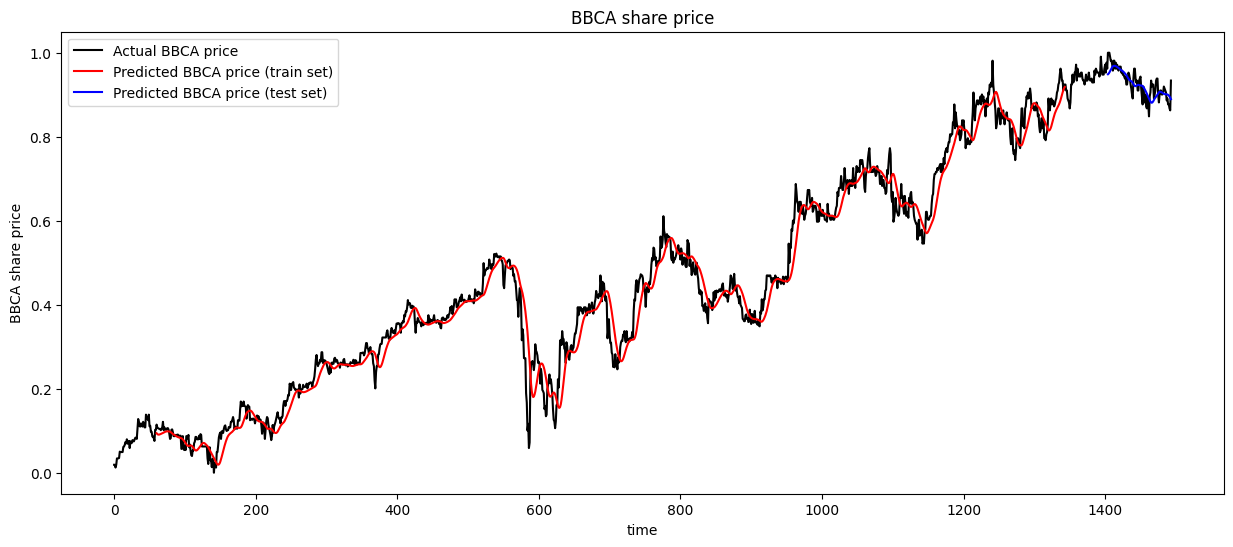

In [23]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [24]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 16ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8815.9599609375
Day 2: Predicted Price = 8798.330078125
Day 3: Predicted Price = 8783.240234375
Day 4: Predicted Price = 8771.0546875
Day 5: Predicted Price = 8761.478515625
Day 6: Predicted Price = 8753.958984375
Day 7: Predicted Price = 8747.9150390625
Day 8: Predicted Price = 8742.845703125
Day 9: Predicted Price = 8738.37109375
Day 10: Predicted Price = 8734.224609375
Day 11: Predicted Price = 8730.2421875
Day 12: Predicted Price = 8726.3232421875
Day 13: Predicted Price = 8722.4228515625
Day 14: Predicted Price = 8718.5185546875
Day 15: Predicted Price = 8714.6044921875
Day 16: Predicted Price = 8710.689453125
Day 17: Predicted Price = 8706.7744140625
Day 18: Predicted Price = 8702.8681640625
Day 19: Predicted Price = 8698.9755859375
Day 20: Predicted Price = 8695.099609375
Day 21: Predicted Price = 8691.2421875
Day 22: Predicted Price = 8687.404296875
Day 23: Predicted P

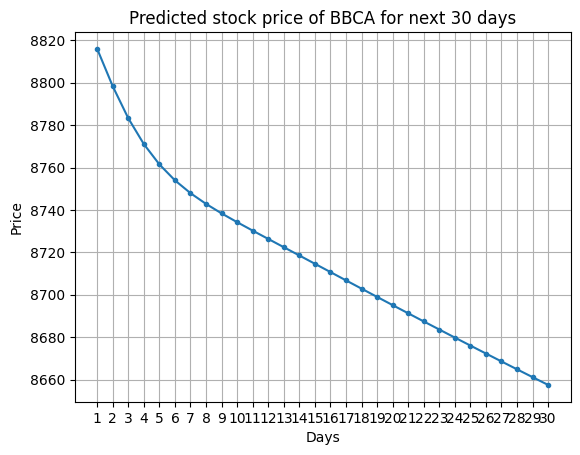

In [25]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [26]:
# Evaluasi model
val_loss = model.evaluate(X_test, y_test)

print(f'Validation Loss: {val_loss}')

# Jika Anda memerlukan nilai MSE juga
val_mse = val_loss  # karena val_loss langsung berisi MSE
print(f'Validation MSE Loss: {val_mse}')



3/3 [==============================] - 0s 8ms/step - loss: 5.2868e-04
Validation Loss: 0.0005286830710247159
Validation MSE Loss: 0.0005286830710247159


In [27]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.03985934605562886
Testing RMSE: 0.02299310892669595


epoch = 75

In [28]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=75,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/75
41/41 [==============================] - 2s 43ms/step - loss: 0.0065 - val_loss: 6.1790e-04
Epoch 2/75
41/41 [==============================] - 2s 40ms/step - loss: 0.0061 - val_loss: 0.0014
Epoch 3/75
41/41 [==============================] - 2s 42ms/step - loss: 0.0052 - val_loss: 5.4741e-04
Epoch 4/75
41/41 [==============================] - 2s 44ms/step - loss: 0.0056 - val_loss: 5.2697e-04
Epoch 5/75
41/41 [==============================] - 2s 42ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 6/75
41/41 [==============================] - 2s 42ms/step - loss: 0.0049 - val_loss: 0.0030
Epoch 7/75
41/41 [==============================] - 2s 41ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 8/75
41/41 [==============================] - 2s 41ms/step - loss: 0.0048 - val_loss: 5.0840e-04
Epoch 9/75
41/41 [==============================] - 2s 40ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 10/75
41/41 [==============================] - 2s 43ms/step - loss: 0.0052 - val_loss: 

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 17ms/step


In [30]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [31]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.03208173711550834
0.02151518313932139


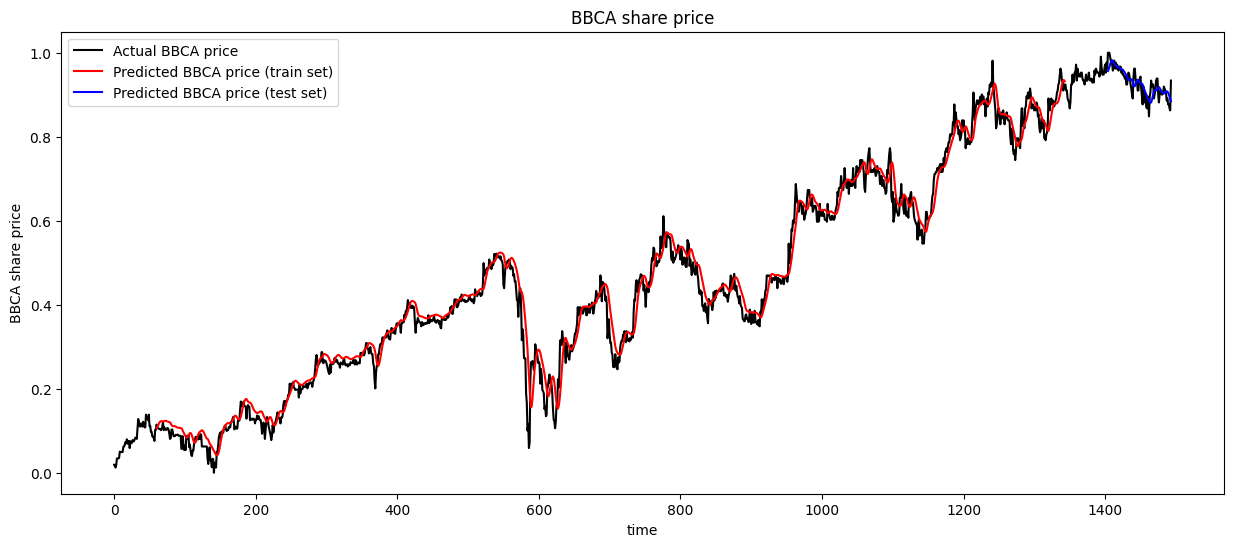

In [32]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [33]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 16ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8790.4091796875
Day 2: Predicted Price = 8769.056640625
Day 3: Predicted Price = 8757.775390625
Day 4: Predicted Price = 8753.94921875
Day 5: Predicted Price = 8754.490234375
Day 6: Predicted Price = 8757.0009765625
Day 7: Predicted Price = 8759.9951171875
Day 8: Predicted Price = 8762.7294921875
Day 9: Predicted Price = 8764.9404296875
Day 10: Predicted Price = 8766.619140625
Day 11: Predicted Price = 8767.8603515625
Day 12: Predicted Price = 8768.7802734375
Day 13: Predicted Price = 8769.478515625
Day 14: Predicted Price = 8770.0302734375
Day 15: Predicted Price = 8770.4853515625
Day 16: Predicted Price = 8770.8779296875
Day 17: Predicted Price = 8771.23046875
Day 18: Predicted Price = 8771.5546875
Day 19: Predicted Price = 8771.86328125
Day 20: Predicted Price = 8772.16015625
Day 21: Predicted Price = 8772.4521484375
Day 22: Predicted Price = 8772.7421875
Day 23: Predicted 

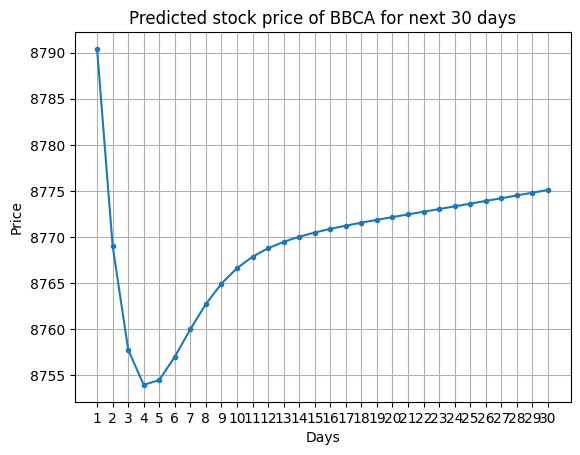

In [34]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [35]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.03208173711550834
Testing RMSE: 0.02151518313932139


epoch = 100

In [36]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/100
41/41 [==============================] - 2s 58ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 2/100
41/41 [==============================] - 2s 55ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 3/100
41/41 [==============================] - 2s 55ms/step - loss: 0.0045 - val_loss: 6.2524e-04
Epoch 4/100
41/41 [==============================] - 2s 59ms/step - loss: 0.0034 - val_loss: 4.8166e-04
Epoch 5/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0036 - val_loss: 4.6132e-04
Epoch 6/100
41/41 [==============================] - 2s 52ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 7/100
41/41 [==============================] - 2s 52ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 8/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0036 - val_loss: 4.5727e-04
Epoch 9/100
41/41 [==============================] - 2s 53ms/step - loss: 0.0039 - val_loss: 4.6904e-04
Epoch 10/100
41/41 [==============================] - 2s 56ms/step - loss: 0.004

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 17ms/step


In [38]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [39]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.031943579122627797
0.021377300901126543


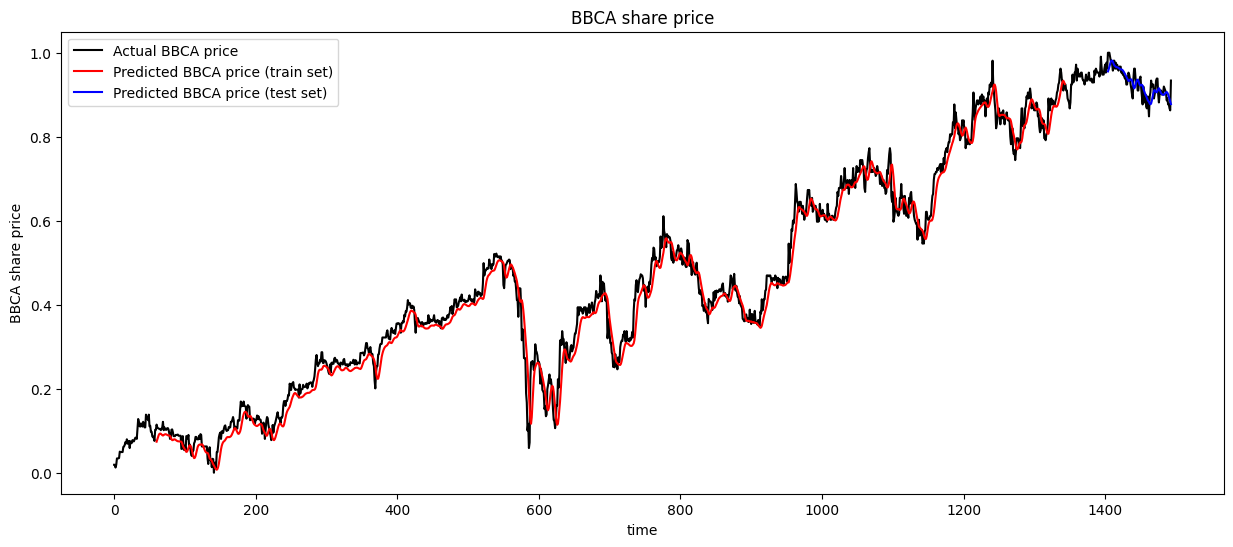

In [40]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [41]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 44ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8754.4287109375
Day 2: Predicted Price = 8733.7392578125
Day 3: Predicted Price = 8723.33203125
Day 4: Predicted Price = 8719.5654296875
Day 5: Predicted Price = 8718.93359375
Day 6: Predicted Price = 8719.064453125
Day 7: Predicted Price = 8718.71875
Day 8: Predicted Price = 8717.4501953125
Day 9: Predicted Price = 8715.259765625
Day 10: Predicted Price = 8712.3330078125
Day 11: Predicted Price = 8708.8955078125
Day 12: Predicted Price = 8705.142578125
Day 13: Predicted Price = 8701.216796875
Day 14: Predicted Price = 8697.2109375
Day 15: Predicted Price = 8693.181640625
Day 16: Predicted Price = 8689.158203125
Day 17: Predicted Price = 8685.1572265625
Day 18: Predicted Price = 8681.1806640625
Day 19: Predicted Price = 8677.2314453125
Day 20: Predicted Price = 8673.3076171875
Day 21: Predicted Price = 8669.40625
Day 22: Predicted Price = 8665.5244140625
Day 23: Predicted Pric

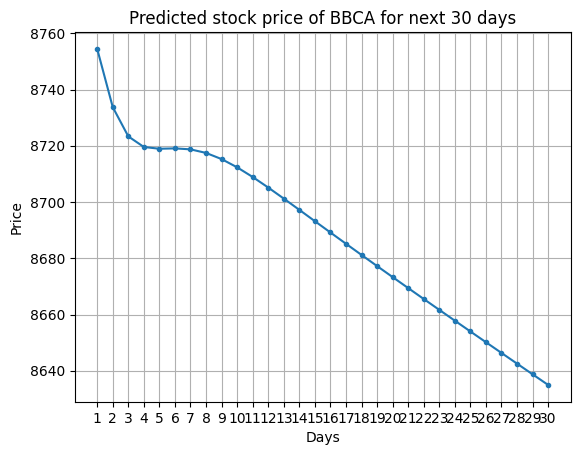

In [42]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [43]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.031943579122627797
Testing RMSE: 0.021377300901126543


epoch = 125

In [44]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=125,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/125
41/41 [==============================] - 3s 61ms/step - loss: 0.0032 - val_loss: 4.7432e-04
Epoch 2/125
41/41 [==============================] - 2s 59ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 3/125
41/41 [==============================] - 3s 61ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 4/125
41/41 [==============================] - 2s 59ms/step - loss: 0.0033 - val_loss: 4.5914e-04
Epoch 5/125
41/41 [==============================] - 2s 61ms/step - loss: 0.0030 - val_loss: 6.2049e-04
Epoch 6/125
41/41 [==============================] - 2s 58ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 7/125
41/41 [==============================] - 2s 58ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 8/125
41/41 [==============================] - 2s 56ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/125
41/41 [==============================] - 2s 59ms/step - loss: 0.0035 - val_loss: 8.3984e-04
Epoch 10/125
41/41 [==============================] - 2s 61ms/step - loss: 0.0030 - 

In [45]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 24ms/step


In [46]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [47]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02810924710793344
0.02142762309978496


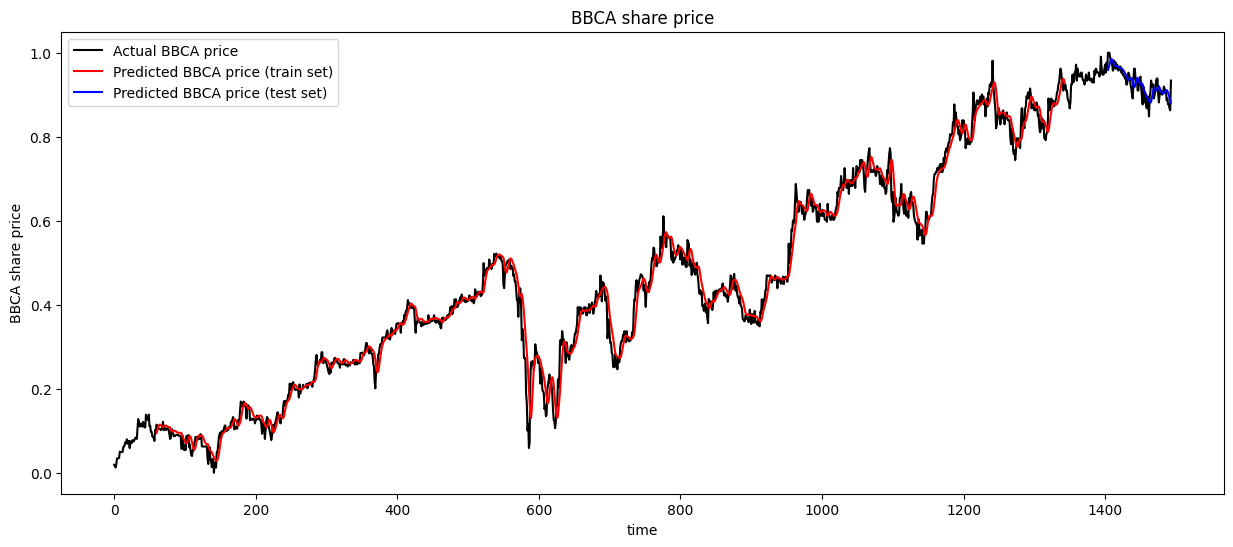

In [48]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [49]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 31ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8770.6572265625
Day 2: Predicted Price = 8753.2666015625
Day 3: Predicted Price = 8748.388671875
Day 4: Predicted Price = 8751.21484375
Day 5: Predicted Price = 8757.3623046875
Day 6: Predicted Price = 8763.99609375
Day 7: Predicted Price = 8769.728515625
Day 8: Predicted Price = 8774.142578125
Day 9: Predicted Price = 8777.3369140625
Day 10: Predicted Price = 8779.6044921875
Day 11: Predicted Price = 8781.255859375
Day 12: Predicted Price = 8782.5458984375
Day 13: Predicted Price = 8783.650390625
Day 14: Predicted Price = 8784.677734375
Day 15: Predicted Price = 8785.6875
Day 16: Predicted Price = 8786.7109375
Day 17: Predicted Price = 8787.75390625
Day 18: Predicted Price = 8788.818359375
Day 19: Predicted Price = 8789.900390625
Day 20: Predicted Price = 8790.994140625
Day 21: Predicted Price = 8792.0966796875
Day 22: Predicted Price = 8793.201171875
Day 23: Predicted Price 

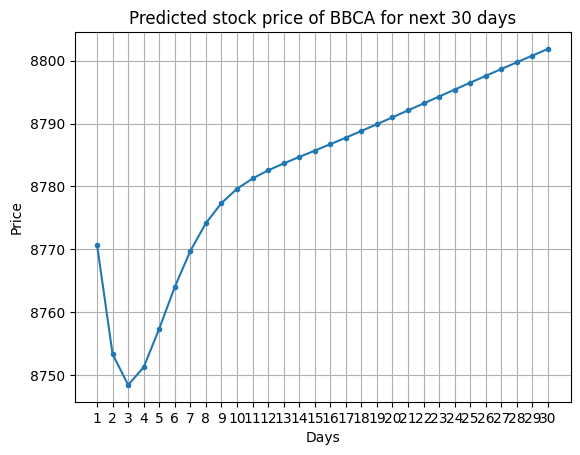

In [50]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [51]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02810924710793344
Testing RMSE: 0.02142762309978496


epoch = 150

In [52]:
checkpoints = ModelCheckpoint(filepath= 'bbca.h5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=150,
          batch_size=32,
          verbose=1,
          callbacks=[checkpoints,early_stopping])

Epoch 1/150
41/41 [==============================] - 2s 60ms/step - loss: 0.0031 - val_loss: 5.8279e-04
Epoch 2/150
41/41 [==============================] - 3s 62ms/step - loss: 0.0035 - val_loss: 0.0069
Epoch 3/150
41/41 [==============================] - 2s 59ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 4/150
41/41 [==============================] - 2s 58ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 5/150
41/41 [==============================] - 2s 61ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 6/150
41/41 [==============================] - 3s 67ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 7/150
41/41 [==============================] - 3s 73ms/step - loss: 0.0030 - val_loss: 5.4461e-04
Epoch 8/150
41/41 [==============================] - 3s 69ms/step - loss: 0.0034 - val_loss: 4.5370e-04
Epoch 9/150
41/41 [==============================] - 3s 77ms/step - loss: 0.0030 - val_loss: 5.7093e-04
Epoch 10/150
41/41 [==============================] - 3s 75ms/step - loss: 0.0031 - 

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 18ms/step


In [54]:
#train_predict=scaler.inverse_transform(train_predict)
#test_predict=scaler.inverse_transform(test_predict)


In [55]:
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02895735693374147
0.021300148574468093


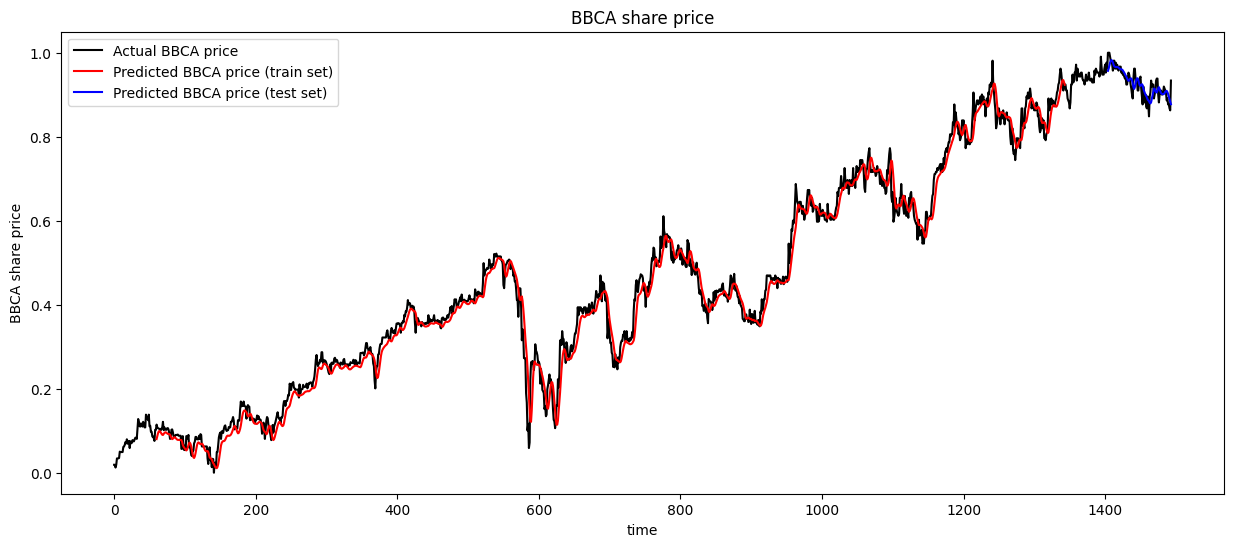

In [56]:
look_back = 60

trainPredictPlot = np.empty_like(new_df)
trainPredictPlot[:]= np.nan
trainPredictPlot[look_back:len(train_predict)+look_back]= train_predict.flatten()

testPredictPlot = np.empty_like(new_df)
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(test_predict)
testPredictPlot[test_start:]= test_predict.flatten()

plt.figure(figsize=(15,6))
plt.plot(scaled_data, color='black', label=f"Actual BBCA price")
plt.plot(trainPredictPlot, color='red', label=f"Predicted BBCA price (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted BBCA price (test set)")

plt.title(f"BBCA share price")
plt.xlabel("time")
plt.ylabel(f"BBCA share price")
plt.legend()
plt.show()

In [57]:
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape(1, n_past, 1)

prediction_next_30_days = []

for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    prediction_next_30_days.append(next_day_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1, 0] = next_day_prediction

prediction_next_30_days = scaler.inverse_transform(np.array(prediction_next_30_days).reshape(-1, 1))

print("Predictions for the next 30 days:")
for i, prediction in enumerate(prediction_next_30_days, start=1):
    print(f"Day {i}: Predicted Price = {prediction[0]}")


1/1 [==============================] - 0s 48ms/step
Predictions for the next 30 days:
Day 1: Predicted Price = 8752.8515625
Day 2: Predicted Price = 8737.0478515625
Day 3: Predicted Price = 8733.0791015625
Day 4: Predicted Price = 8735.873046875
Day 5: Predicted Price = 8741.0546875
Day 6: Predicted Price = 8745.919921875
Day 7: Predicted Price = 8749.2490234375
Day 8: Predicted Price = 8750.802734375
Day 9: Predicted Price = 8750.8466796875
Day 10: Predicted Price = 8749.822265625
Day 11: Predicted Price = 8748.1611328125
Day 12: Predicted Price = 8746.19921875
Day 13: Predicted Price = 8744.1630859375
Day 14: Predicted Price = 8742.18359375
Day 15: Predicted Price = 8740.3212890625
Day 16: Predicted Price = 8738.5869140625
Day 17: Predicted Price = 8736.9697265625
Day 18: Predicted Price = 8735.447265625
Day 19: Predicted Price = 8733.9951171875
Day 20: Predicted Price = 8732.591796875
Day 21: Predicted Price = 8731.220703125
Day 22: Predicted Price = 8729.8701171875
Day 23: Predicte

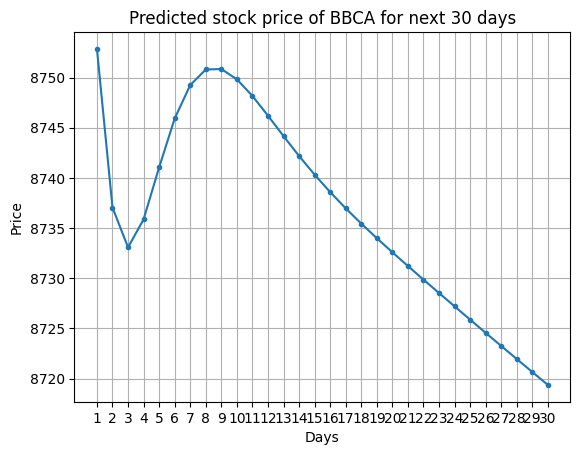

In [58]:
plt.plot(prediction_next_30_days, marker='.')
plt.title(f'Predicted stock price of BBCA for next 30 days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.xticks(range(0, 30), ['1','2','3','4','5','6','7','8','9','10',
                          '11','12','13','14','15','16','17','18','19','20',
                          '21','22','23','24','25','26','27','28','29','30'])
plt.grid(True)
plt.show()

In [59]:
# Menghitung dan mencetak RMSE untuk data latih
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training RMSE: {train_rmse}')

# Menghitung dan mencetak RMSE untuk data uji
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 0.02895735693374147
Testing RMSE: 0.021300148574468093
